# This is PYBER

In [6]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# save file path to variable
city_data = "../raw_data/city_data.csv"

# read with pandas
city_data = pd.read_csv(city_data)
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [8]:
# save file path to variable
ride_data = "../raw_data/ride_data.csv"

# read with pandas
ride_data = pd.read_csv(ride_data)
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [9]:
# merge tables
combined_pd = pd.merge(city_data, ride_data, on ='city')
combined_pd.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [11]:
# group by city
city_group = combined_pd.groupby(by="city")
city_group

In [19]:
# determine types of cities
city_type = city_group['type'].first()
city_type.head()

city
Alvarezhaven       Urban
Alyssaberg         Urban
Anitamouth      Suburban
Antoniomouth       Urban
Aprilchester       Urban
Name: type, dtype: object

In [20]:
# determine avg fares
avg_fares = city_group["fare"].mean()
avg_fares.head()

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: fare, dtype: float64

In [21]:
# total number of rides per city
num_rides = city_group["ride_id"].count()
num_rides.head()

city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: ride_id, dtype: int64

In [22]:
# number of drivers
num_drivers = (city_group['driver_count'].sum())/(city_group['driver_count'].count())
num_drivers.head()

city
Alvarezhaven    21.0
Alyssaberg      67.0
Anitamouth      16.0
Antoniomouth    21.0
Aprilchester    49.0
Name: driver_count, dtype: float64

### Summary Table Grouped by City

In [23]:
# create summary table
city_summary = pd.DataFrame({"Type": city_type,
                            "Average Fare": avg_fares,
                            "Number of Rides": num_rides,
                            "Number of Drivers": num_drivers})
city_summary.head()

,Average Fare,Number of Drivers,Number of Rides,Type
city,,,,
Alvarezhaven,23.928710,21.0,31,Urban
Alyssaberg,20.609615,67.0,26,Urban
Anitamouth,37.315556,16.0,9,Suburban
Antoniomouth,23.625000,21.0,22,Urban
Aprilchester,21.981579,49.0,19,Urban


## Part One

In [92]:
# set the order of columns
city_summary = city_summary[['Type', 'Number of Drivers', 'Number of Rides', 'Average Fare']]
city_summary.head()

,Type,Number of Drivers,Number of Rides,Average Fare
city,,,,
Alvarezhaven,Urban,21.0,31,23.928710
Alyssaberg,Urban,67.0,26,20.609615
Anitamouth,Suburban,16.0,9,37.315556
Antoniomouth,Urban,21.0,22,23.625000
Aprilchester,Urban,49.0,19,21.981579


In [110]:
#figure out max ranges
num_rides.max()

64

In [108]:
#urban
urban = city_summary.loc[city_summary["Type"]== "Urban"]

#suburban
suburban = city_summary.loc[city_summary["Type"]== "Suburban"]

#rural
rural = city_summary.loc[city_summary["Type"]== "Rural"]

## Bubble Plot of Ride Sharing Data

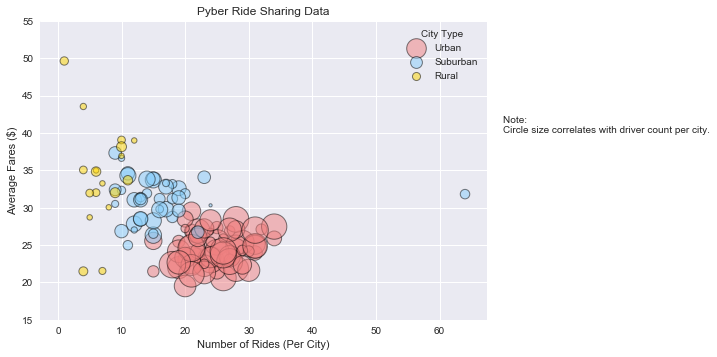

In [155]:
#urban
plt.scatter(urban["Number of Rides"], urban["Average Fare"], color = "lightcoral", edgecolors="black", s = urban["Number of Drivers"]*10, label = "Urban", alpha = 0.5, linewidth = 1)

#Suburban
plt.scatter(suburban["Number of Rides"], suburban["Average Fare"], color = "lightskyblue", edgecolors ="black", s = suburban["Number of Drivers"]*10, label = "Suburban", alpha = 0.5, linewidth = 1)

#Rural
plt.scatter(rural["Number of Rides"], rural["Average Fare"], color = "gold", edgecolors = "black", s = rural["Number of Drivers"]*10, label = "Rural", alpha = 0.5, linewidth = 1)

#Add labels
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")

#Add range and color scheme
plt.grid(color='white')
plt.ylim(15, 55)
plt.style.use('seaborn')

#Add a note to the side
plt.text(70, 40,"Note: \nCircle size correlates with driver count per city.")

#Add the legend.
plt.legend(title = "City Type", loc= "upper right")

#Show plot.
plt.show()

## Part Two

In [26]:
# group by type
by_type = combined_pd.groupby('type')
by_type.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829
1625,Carrollbury,4,Suburban,2016-05-09 03:12:10,25.00,485795568537
1626,Carrollbury,4,Suburban,2016-06-09 05:04:24,49.47,617204620844
1627,Carrollbury,4,Suburban,2016-05-20 06:12:36,35.33,73368831241
1628,Carrollbury,4,Suburban,2016-03-21 17:31:26,20.26,7948046018548
1629,Carrollbury,4,Suburban,2016-08-20 11:20:51,46.67,4786094151694


## % of Total Fares by City Type

In [74]:
# create table/get data
total_fares = combined_pd['fare'].sum()
percent_fares = (by_type['fare'].sum())/total_fares
percent_fares*100

type
Rural        6.579786
Suburban    31.445750
Urban       61.974463
Name: fare, dtype: float64

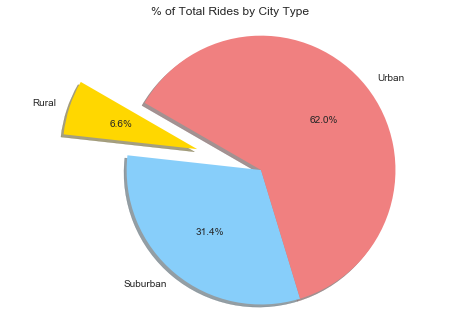

In [157]:
# create labels, designate colors
community = ['Rural', 'Suburban', 'Urban']
percent_community = [6.579786, 31.445750, 61.974463]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [.5, 0, 0]

#chart effects
plt.pie(percent_community, explode=explode, labels=community, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")

# Set a Title
plt.title("% of Total Rides by City Type")
# Prints our pie chart to the screen
plt.show()

## % of Total Rides by City Type

In [71]:
# create table/get data
total_rides = combined_pd['ride_id'].count()
percent_rides = (by_type['ride_id'].count())/total_rides
percent_rides*100

type
Rural        5.193187
Suburban    27.295388
Urban       67.511425
Name: ride_id, dtype: float64

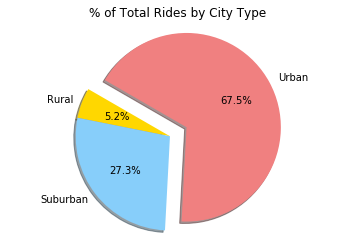

In [73]:
# create labels, designate colors
community = ['Rural', 'Suburban', 'Urban']
percent_community = [5.193187, 27.295388, 67.511425]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [0, 0, 0.2]

#chart effects
plt.pie(percent_community, explode=explode, labels=community, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")
# Set a Title
plt.title("% of Total Rides by City Type")
# Prints our pie chart to the screen
plt.show()

## % of Total Drivers by City Type

In [69]:
# create table/get data
drivers_by_type = by_type['driver_count'].sum()
total_drivers = drivers_by_type.sum()
percent_drivers = drivers_by_type/total_drivers
percent_drivers*100

type
Rural        0.969876
Suburban    12.980602
Urban       86.049521
Name: driver_count, dtype: float64

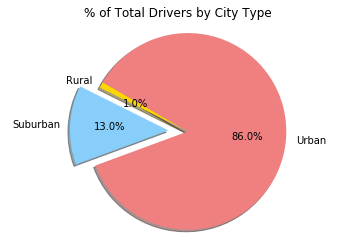

In [70]:
# create labels, designate colors
community = ['Rural', 'Suburban', 'Urban']
percent_community = [.969876, 12.980602, 86.049521]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [0, 0.2, 0]

#chart effects
plt.pie(percent_community, explode=explode, labels=community, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")
# Set a Title
plt.title("% of Total Drivers by City Type")
# Prints our pie chart to the screen
plt.show()